In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
from copy import deepcopy
import networkx.algorithms.community.quality as nxq
import math
import matplotlib.cm as cm
from time import time
import community as community_louvain
import leidenalg
import igraph
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import adjusted_rand_score
from utils import *
from Metrics import *
from Louvain import louvain_algorithm, deg_best_result_of_N_Louvain
from Leiden import leiden_algorithm, deg_best_result_of_N_Leiden
from Walktrap import walktrap_algorithm

# Louvain Algorithm

## Karate Club Network

### Our implementation

Time: 1.0893065929412842s
[{0, 33, 9, 15, 16, 19, 21, 23, 27, 30, 31}, {1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22}, {17, 5, 6, 7, 11}, {32, 24, 25, 26, 28, 29}]
Best modularity found: 0.42983639736886486


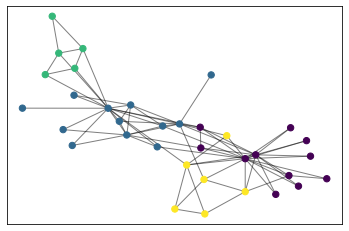

In [3]:
t0 = time()

# Applying Louvain 10 times to maximize the chances of getting the highest possible modularity
file_path = 'karate.txt'
partition, q = deg_best_result_of_N_Louvain(file_path, N=10)

print(f'Time: {time() - t0}s')
print(partition)

partition = community_to_dict(partition)
print(f'Best modularity found: {q}')

G = load_graph(file_path)
drawing_partition(partition, G)

### Open source implementation

0.4269691347613426
Best modularity found: 0.4269691347613426
Best partition found: {0: 0, 9: 0, 14: 1, 15: 0, 16: 0, 19: 0, 20: 1, 21: 0, 23: 0, 24: 0, 27: 0, 28: 0, 29: 2, 30: 0, 31: 0, 32: 2, 33: 0, 2: 1, 1: 1, 3: 1, 4: 1, 5: 3, 6: 3, 7: 3, 8: 1, 10: 1, 11: 3, 12: 1, 13: 1, 17: 3, 18: 1, 22: 1, 26: 2, 25: 2}


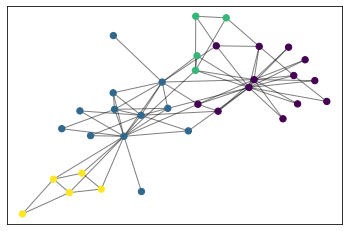

In [4]:
G = nx.read_edgelist('karate.txt',create_using=nx.Graph(), nodetype = int)
partition = community_louvain.best_partition(G)

print(community_louvain.modularity(partition, G))
print(f'Best modularity found: {community_louvain.modularity(partition, G)}')
print(f'Best partition found: {partition}')

drawing_partition(partition, G)

We can see from these two experiments that our implementation of the algorithm reaches good results. Let's convey some experiments on a bigger graph.

## DBLP Graph

Let's focus on a subgraph of the DBLP graph as applying Louvain is computationnaly expensive.

In [5]:
# Loading the graph
G = load_graph('com-dblp.ungraph.txt')
nodes = list(G.nodes())

#subgraph
G_sub = G.subgraph(nodes[0:100])

### Our implementation

Time: 4.307648181915283s
Best modularity found: 0.51189168811159


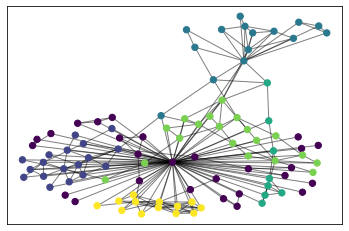

In [6]:
t0 = time()

# Applying Louvain only one time
partition, q = louvain_algorithm(G_sub)

print(f'Time: {time() - t0}s')
# print(partition)

partition = community_to_dict(partition)
print(f'Best modularity found: {q}')

drawing_partition(partition, G_sub)

### Open source implementation

Best modularity found: 0.5118916881115901


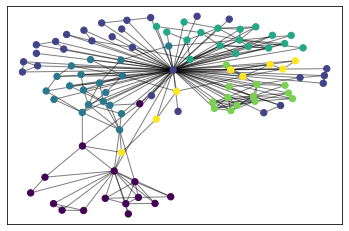

In [7]:
partition = community_louvain.best_partition(G_sub)
print(f'Best modularity found: {community_louvain.modularity(partition, G_sub)}')

drawing_partition(partition, G_sub)

# Leiden Algorithm

## Karate Club network

### Our implementation

Time: 4.8815131187438965s
Partition: [{1, 2, 3, 4, 8, 10, 12, 13, 14, 18, 20, 22}, {32, 24, 25, 26, 28, 29}, {0, 33, 9, 15, 16, 19, 21, 23, 27, 30, 31}, {17, 5, 6, 7, 11}]
Best modularity found: 0.4298363973688649


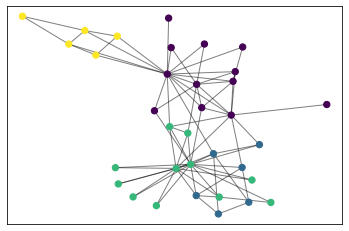

In [8]:
t0 = time()

graph_file = 'karate.txt'
partition, q = deg_best_result_of_N_Leiden(graph_file, N=10)

print(f'Time: {time() - t0}s')
print(f'Partition: {partition}')

partition = community_to_dict(partition)
print(f'Best modularity found: {q}')

G = load_graph(file_path)
drawing_partition(partition, G)

### Open Source implementation

Partition: Clustering with 34 elements and 4 clusters
[0] 14, 20, 1, 3, 2, 4, 8, 18, 22, 12, 13, 10
[1] 0, 9, 15, 16, 19, 21, 23, 27, 30, 31, 33
[2] 24, 28, 29, 32, 26, 25
[3] 5, 6, 7, 11, 17
Time: 0.0009992122650146484s
Best modularity found: 0.429836397368865


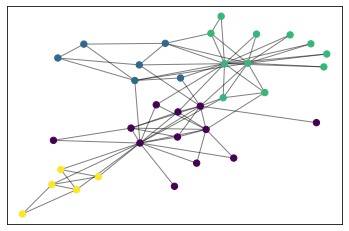

In [9]:
t0 = time()

g = igraph.Graph.TupleList(G.edges(), directed=False)
part = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
print(f'Partition: {part}')

print(f'Time: {time() - t0}s')

q = part.modularity
print(f'Best modularity found: {q}')

drawing_partition(partition, G)

## DBLP Graph

Let's focus on a subgraph of the DBLP graph as applying Louvain is computationnaly expensive.

In [17]:
# Loading the graph
G = load_graph('com-dblp.ungraph.txt')
nodes = list(G.nodes())

#subgraph
G_sub = G.subgraph(nodes[0:100])

### Our implementation

Time: 38.72761249542236s
Best modularity found: 0.5120719893786163


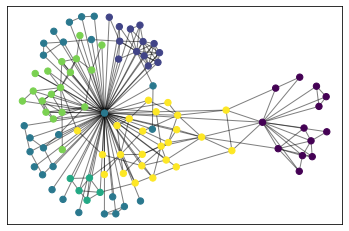

In [18]:
t0 = time()

partition, q = leiden_algorithm(G_sub)
partition = community_to_dict(partition)

print(f'Time: {time() - t0}s')

print(f'Best modularity found: {q}')

drawing_partition(partition, G_sub)

### Open Source implementation

Partition: Clustering with 100 elements and 6 clusters
[0] 1, 5915, 7741, 9335, 12238, 13419, 13811, 18035, 22970, 27466, 28995,
    31096, 40548, 44725, 47489, 49144, 58164, 58212, 63386, 66243, 73133,
    74815, 81806, 84042, 95874, 110696, 166307, 198462, 229958
[1] 7852, 15004, 16408, 35156, 36918, 49063, 66668, 84805, 85126, 86291,
    93377, 97590, 97591, 162643, 164373, 179100, 193261, 194924
[2] 2, 7979, 13090, 15432, 16259, 16803, 17411, 27021, 33126, 37774, 44446,
    56260, 66305, 67191, 75213, 78424, 97758
[3] 0, 4519, 23073, 33043, 33971, 75503, 101215, 120044, 123880, 124002,
    206567, 274042, 369692, 411025, 413808, 90680
[4] 8085, 8086, 10971, 14662, 21502, 92739, 92740, 113230, 115324, 159465,
    173255, 173256, 223322
[5] 29998, 33762, 46588, 77551, 83059, 103133, 122675
Time: 0.004984855651855469s
Best modularity found: 0.5154157583307382


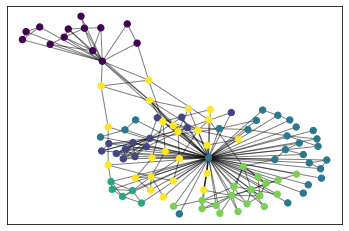

In [20]:
t0 = time()

g = igraph.Graph.TupleList(G_sub.edges(), directed=False)
part = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
print(f'Partition: {part}')

print(f'Time: {time() - t0}s')

q = part.modularity
print(f'Best modularity found: {q}')

drawing_partition(partition, G_sub)

# Walktrap Algorithm

## Karate club Network


Time: 4.809059143066406s
Partition: [{10}, {32, 24, 25, 26, 28, 29}, {5, 6, 7, 11, 17}, {0, 33, 9, 15, 16, 19, 21, 23, 27, 30, 31}, {1, 2, 3, 4, 8, 12, 13, 14, 18, 20, 22}]
Best modularity found: 0.4219092595715972


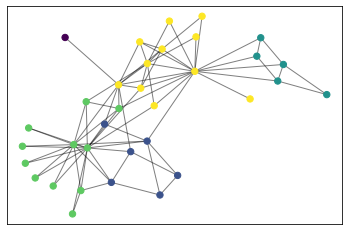

In [10]:
t0 = time()

G = load_graph('karate.txt')
partitions, modularities = walktrap_algorithm(G)

ind = modularities.index(max(modularities))
q = max(modularities)
partition = partitions[ind]

print(f'Time: {time() - t0}s')
print(f'Partition: {partition}')

partition = community_to_dict(partition)
print(f'Best modularity found: {q}')

drawing_partition(partition, G)

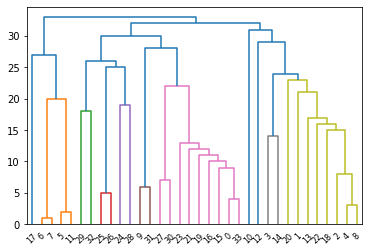

In [3]:
part = format_dendrogram(partitions)
plot_dendrogram(G, part)

## DBLP Network

In [4]:
G = load_graph('com-dblp.ungraph.txt')
nodes = list(G.nodes())

G_sub = G.subgraph(nodes[0:100])
nx.is_connected(G_sub)

True


Time: 460.7122986316681s
Partition: [{124002, 120044, 206567}, {58164, 44725, 81806}, {22970, 66243, 13811}, {47489, 58212, 12238}, {33762, 77551, 83059, 122675, 46588}, {84042, 28995, 27466, 63386}, {31096, 49144, 13419, 74815}, {0, 23073, 4519, 123880, 75503, 413808, 274042, 369692}, {93377, 84805, 85126, 49063, 179100, 7852, 66668, 194924, 193261, 162643, 35156, 164373, 86291, 97590, 36918, 16408, 15004, 97591}, {1, 95874, 17411, 16259, 66305, 2, 27021, 37774, 5915, 44446, 13090, 166307, 16803, 7979, 73133, 29998, 90680, 7741, 198462, 56260, 15432, 75213, 78424, 103133, 97758, 9335, 33126, 110696, 18035, 67191}, {92739, 40548, 92740, 14662, 229958, 173255, 173256, 159465, 113230, 8085, 8086, 223322, 10971, 115324, 21502}, {411025, 33043, 33971, 101215}]
Best modularity found: 0.4820764149551705


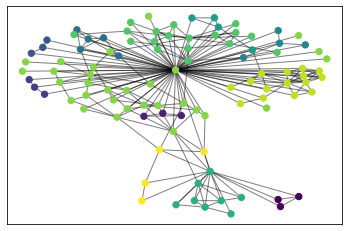

In [5]:
t0 = time()

partitions, modularities = walktrap_algorithm(G_sub)

ind = modularities.index(max(modularities))
q = max(modularities)
partition = partitions[ind]

print(f'Time: {time() - t0}s')
print(f'Partition: {partition}')

partition = community_to_dict(partition)
print(f'Best modularity found: {q}')

drawing_partition(partition, G_sub)